In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import statistics
import time
from math import exp
import math 
import itertools 
import sklearn.metrics as metrics

In [ ]:
img_dir = "sample_images1" # Enter Directory of all images from sample_images1
data_path = os.path.join(img_dir,'*')
img_files = glob.glob(data_path)
img_files

In [ ]:
#read images on the sample_images1 and put them in seperate lists
img_list=[]

for s in img_files:
    img = cv2.imread(s,cv2.IMREAD_GRAYSCALE)
    img_list.append(img)


In [ ]:
#creating kernels
kernelX=np.array([[0,0,0],[1,-1,0],[0,0,0]],dtype=np.float64)
kernelY=np.array([[0,0,0],[0,-1,0],[0,1,0]],dtype=np.float64)
sobelX = np.array([[-1, 0 ,1], [-2 ,0 ,2], [-1, 0, 1]], dtype=np.float64)/8
sobelY = np.array([[-1, -2 ,-1], [0 ,0 ,0], [1, 2, 1]], dtype=np.float64)/8

In [ ]:
#function for flipping filters
def Flip(kernel):

    flip_kernel = np.zeros(kernel.shape,dtype = np.int32)

    for i in range(kernel.shape[0],0,-1):
        for j in range(kernel.shape[1],0,-1):
            flip_kernel[i-1][j-1] = kernel[kernel.shape[0]-i][kernel.shape[1]-j]

    return flip_kernel

In [ ]:
#function that apply convolution to images
def Convolution(image, kernel):
    img_h, img_w = image.shape
    filter_size = kernel.shape[0]

    padding = int((kernel.shape[0]-1)/2)
    padding_add = int(padding*2)
    input_image_with_padding = np.zeros([image.shape[0]+padding_add, image.shape[1]+padding_add])
    input_image_with_padding[padding:img_h+padding, padding:img_w+padding] = image[:,:]

    #flip_filter = Flip(kernel)
    flip_filter = cv2.flip(kernel, -1)
    
    
    output_img = np.zeros(image.shape, dtype=image.dtype)

    for i in range(img_h):
        for j in range(img_w):
            temp = input_image_with_padding[i:i+filter_size, j:j+filter_size]
            output_img[i,j] = np.uint8(np.sum(np.double(temp)*np.double(flip_filter)))

    return output_img

In [ ]:
#x axis derivatives of images
derX=[]
for i in img_list:
    
    img = Convolution(i,kernelX)
    derX.append(img)
    cv2.imshow("derivativeX",np.uint8(img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#y axis derivatives of images
derY=[]
for i in img_list:
    
    img = Convolution(i,kernelY)
    derY.append(img)
    cv2.imshow("derivativeY",np.uint8(img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
# function to calculate the square of a matrix
def MatrixMult(image):
    MultKer = np.zeros(image.shape,dtype = np.float64)
    
    for s in range(image.shape[0]):
        for d in range (image.shape[1]):
            for k in range (image.shape[1]):
                MultKer[s][d]+=int(image[s][k])*int(image[k][d])
    return MultKer

In [ ]:
#find gradient magnitude for question 1
GradMagnitude=[]

for i in range(len(derX)): 
    mag=derX[i]+derY[i]
    mag2 = cv2.normalize(mag, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    GradMagnitude.append(mag2)
    cv2.imshow("grad magnitude",np.uint8(mag2))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#sobel x
sobX=[]
for i in img_list:
    
    img = Convolution(i,sobelX)
    sobX.append(img)
    cv2.imshow("sobelX",np.uint8(img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#sobel y
sobY=[]
for i in img_list:
    
    img = Convolution(i,sobelY)
    sobY.append(img)
    cv2.imshow("sobelY",np.uint8(img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#find gradient magnitude for sobel
GradMagnitudeSob=[]

for i in range(len(sobX)): 
    mag=sobX[i]+sobY[i]
    mag2 = cv2.normalize(mag, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    GradMagnitudeSob.append(mag2)
  
    cv2.imshow("grad magnitude for sobel",np.uint8(mag2))
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [2]:
img_dir = "sample_images2" # Enter Directory of all images from sample_images1
data_path = os.path.join(img_dir,'*')
img_files2 = glob.glob(data_path)
img_files2

['sample_images2/grayImage.jpg', 'sample_images2/ground_truth.png']

In [4]:
#read images
img_list2=[]

for s in img_files2:
    img2 = cv2.imread(s,cv2.IMREAD_GRAYSCALE)
    img_list2.append(img2)

NameError: name 'img_files2' is not defined

In [ ]:
# calculate histogram for the images
data = np.zeros(256)
for i in img_list2:
    for r in range(img2.shape[0]):
        for c in range (img2.shape[1]):
            temp=i[r][c]
            data[temp]+=1
    plt.plot(data)  
    plt.show()
    for s in range(len(data)):
        data[s]=0

In [5]:
# threshold algorithm that inspired from Otsu
def Threshold():
    data = np.zeros(256)
    for i in img_list2:
        for r in range(img2.shape[0]):
            for c in range (img2.shape[1]):
                temp=i[r][c]
                data[temp]+=1

    weight1 = np.cumsum(data)
    weight2 = np.cumsum(data[::-1])

    mean_val1=np.cumsum(data*256)/weight1
    mean_val2=((np.cumsum(data*256)[::-1])/weight2[::-1])[::-1]

    variance_val=weight1*weight2*(mean_val1-mean_val2)**2

    indx = np.argmax(variance_val)
    
    threshold=data[:-1][indx]
    
    return threshold

In [6]:
#applying threshold to the image
def Thresholding(img,val):
    if val==-1:
        th=Threshold()
    else:
        th=val
    new_img = np.zeros(img.shape,dtype = np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            color_val=img[i][j]
            
            if color_val>th:
                new_img[i][j]=255
            else:
                new_img[i][j]=0
    return new_img
    

In [7]:
#show the thresholded image
new_img=Thresholding(img_list2[0],-1)
cv2.imshow("thresholded image",np.uint8(new_img))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#threshold ground truth with cv2 because my algorithm didnt work for this 
thresh_ground=[]
img_ground=img_list2[1]
retval, threshold = cv2.threshold(img_ground, 12, 255, cv2.THRESH_BINARY)
thresh_ground.append(img_ground)
cv2.imshow('original ground truth',img_ground)
cv2.imshow('thresholded ground truth',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#plot ROC curve for my thresholding algorithm
#calculating tp,tn,fp,fn positive, negative, false positive rate and true positive rate for the ROC curve
ground=thresh_ground[0]
tpr=[]
fpr=[]
for s in range(0,256,8):
    thresh=Thresholding(img_list2[0],s)
    
    pos=0
    neg=0
    fp=0
    fn=0
    tp=0
    tn=0

    for i in range(ground.shape[0]):
        for j in range(ground.shape[1]):

            if(ground[i][j]==thresh[i][j] and ground[i][j]==0):
                tn+=1
            elif(ground[i][j]==thresh[i][j] and ground[i][j]==255):
                tp+=1
            elif(ground[i][j]!=thresh[i][j] and thresh[i][j]==0):
                fn+=1
            elif(ground[i][j]!=thresh[i][j] and thresh[i][j]==255):
                fp+=1
    neg=fp+tn
    pos=fn+tp

    fp_rate=fp/neg
    tp_rate=tp/pos


    tpr.append(tp_rate)
    fpr.append(fp_rate)

0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
232
240
248


32
1.0 1.0
1.0 1.0
0.9998796195979295 0.9999746790570481
0.999337907788612 0.9998987162281924
0.9962682075358131 0.9984807434228851
0.9848320693391116 0.9768819790849012
0.96563139520886 0.7945585293596333
0.9388467557481642 0.3648621274656268
0.9034549175394245 0.0835717722127972
0.8703503069700252 0.01931987947231155
0.846334416756952 0.006304914795026967
0.8255687973997833 0.00226622439419644
0.8054652702540026 0.0011014610184083256
0.784037558685446 0.0005823816878940571
0.7610449018899723 0.0003671536728027752
0.7391958589141687 0.00024054895804319752
0.711087035030697 0.00015192565771149317
0.6746719634043578 0.00011394424328361989
0.6377753701697364 7.596282885574659e-05
0.5914891055736126 3.798141442787329e-05
0.5179366799085109 2.532094295191553e-05
0.4550981100276875 1.2660471475957765e-05
0.4150114361381967 0.0
0.38798603587335984 0.0
0.3642109064644276 0.0
0.34326471650415313 0.0
0.3249067051883953 0.0
0.3039003250270856 0.0
0.27169856747321536 0.0
0.227940291320573 0.0
0.1

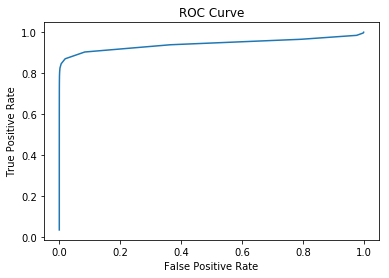

In [12]:
# plot the ROC curve

plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()